In [ ]:
# Machine learning model to predict win probability based on both teams champions

In [2]:
import cassiopeia as cass

cass.set_riot_api_key("") # Riot API key: https://developer.riotgames.com/

In [3]:
# Collect summoner IDs
challenger_league = cass.get_challenger_league(queue=cass.Queue.ranked_solo_fives,region='NA')
gm_league = cass.get_grandmaster_league(queue=cass.Queue.ranked_solo_fives,region='NA')
master_league = cass.get_master_league(queue=cass.Queue.ranked_solo_fives,region='NA')

In [6]:
from cassiopeia.core import Summoner, MatchHistory, Match
from cassiopeia import Queue, Patch

In [7]:
patch = Patch.from_str("11.22", region='NA')

Making call: https://cdn.merakianalytics.com/riot/lol/resources/patches.json


In [8]:
all_players = set()
all_games = set()

In [9]:
# Collect PUUIDs from summoner IDs
for entry in challenger_league:
  all_players.add(entry.summoner.puuid)
for entry in gm_league:
  all_players.add(entry.summoner.puuid)
for entry in master_league:
  all_players.add(entry.summoner.puuid)

Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/TATQ9qtOUyF95YnAZybwNPdMVUhgG05xe7aFLc8DZF8Q1b4
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/rthwCJiZHIfArehOZn5CSwNndxwna7GFNcv2OkPpV90uJQM5ZdRa_zo3SA
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/P9yOAbZsoFtf_diYDy_YjOUbOwcG73gcx8a5B388AXTPtsI
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/_Al7bfN3vVwPwIrUFW33t7z4SIKxIWKInutYT8PUK11tsX07
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/LgXR0GngZmsaZzKvdX0O91-3uoxF2A_l3kyvSrClyd3wMzxnHPjDQz1m-w
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/BbjmBLPNMAZibmD8tjywEYfGaEsLAMZK6SAE66EnOO7ovoE
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/d-CvCpt2tOCLBwtLgrNu351YzH4zMhzP40P2aqzE7E-d2OET
Making call: https://na1.api.riotgames.com/lol/summoner/v4/summoners/MxZL_hHDB0tvlcmFZ1vuPBo5bJM00QkrTU3SyvDTmFgOyK4
Making call: https://na1.api.riotgames.c

In [10]:
# Collect all games played by players in master, grandmaster and challenger league
for player in all_players:
  for game in cass.get_match_history(region='NA',puuid = player, continent='AMERICAS', begin_time=patch.start,queue=Queue.ranked_solo_fives):
    all_games.add(game.id)

Making call: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/UOLa4Cq9mD3ieM410KTcukNhrHOkfkoPefGpOPIKU3UZBH-vpzl2pniyBaAqxTnvvh64irwVJtUCTQ/ids?beginIndex=0&endIndex=100&queue=420
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/k--Ebr-zYp5-pSfDAyfXQs33iiD3rZUWogQhHoU59iePsyuY_taQlQkBrLWimd8O1WatK8OhKiepBA/ids?beginIndex=0&endIndex=100&queue=420
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/hQfwtS9moGVSHwgSyuWSUoWX6_3r0ALXt-45MJkVxQVH_OOZP2XNR4k8Fl68E-HuKkcVP8My-rnqFw/ids?beginIndex=0&endIndex=100&queue=420
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/YxRbLXHxj9uihzZG5kE-nX9GXNjrERWlkjEOVuzj0EMgLGgYQBRMjuOWNGndIIpsetglcgcFDcOWkA/ids?beginIndex=0&endIndex=100&queue=420
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/TeKkMm2A0OE4BQZ3qYlA6QbNNWqVmZ4bW_PscQ7fVeyUhhxaUr9FUsIXaui9PqOCcXrrRRDvGhIAbA/ids?beginIndex=0&endIndex=100&queue=420
Making call: ht

In [12]:
matches = []
results = []

In [13]:
# Collect champion data from each game, players 1-5 are blue team, 6-10 red
for match in all_games:
    match = cass.Match(id = match, continent='AMERICAS', region = 'NA')
    if match.queue == Queue.ranked_solo_fives:
        champions = []
        for player in match.participants[:10]:
            champions.append(player.champion.id)
        matches.append(champions)
        if match.participants[0].stats.win == True:
            results.append(1)
        else:
            results.append(0)
    else:
        print(match.queue)

    

Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4090779520
Making call: https://ddragon.leagueoflegends.com/api/versions.json
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4100485164
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4092171553
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4106481955
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4099472985
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4109887165
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4098309671
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4108018595
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4103579411
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4091528112
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4088385256
Making ca

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
onehotblue = []
onehotred = []

In [18]:
for comp in matches:
    a = np.zeros(shape=(887,))
    b = np.zeros(shape=(887,))
    for hero in comp[:5]:
        a[hero-1] = 1
    for hero in comp[5:]:
        b[hero-1] = 1
    onehotblue.append(a)
    onehotred.append(b)

In [41]:
# Prepare data
y_train = tf.convert_to_tensor(results[:2500])
blue_train = tf.convert_to_tensor(onehotblue[:2500])
red_train = tf.convert_to_tensor(onehotred[:2500])
y_train = tf.convert_to_tensor(results[:2500])
blue_test = tf.convert_to_tensor(onehotblue[2500:])
red_test = tf.convert_to_tensor(onehotred[2500:])
y_test = tf.convert_to_tensor(results[2500:])

In [6]:
# Build model, first evaluates each team seperately, then combined
inputsblue = keras.Input(shape=(887,))
blue = layers.Dense(64, activation="relu")(inputsblue)
blue = layers.Dropout(0.25)(blue)
blue = layers.Dense(64, activation="relu")(blue)
outputsblue = layers.Dense(64, activation="relu")(blue)
modelblue = keras.Model(inputs=inputsblue, outputs=outputsblue, name="blue_team")
inputsred = keras.Input(shape=(887,))
red = layers.Dense(64, activation="relu")(inputsred)
red = layers.Dropout(0.25)(red)
red = layers.Dense(64, activation="relu")(red)
outputsred = layers.Dense(64, activation="relu")(red)
modelred = keras.Model(inputs=inputsred, outputs=outputsred, name="red_team")
combined = layers.Concatenate(name="concatenate_layer")([modelred.output, modelblue.output])
combined = layers.Dropout(0.75)(combined)
combined = layers.Dense(64, activation="relu")(combined)
combined = layers.Dropout(0.75)(combined)
combined = layers.Dense(64, activation="relu")(combined)
outsputscombined = layers.Dense(1, activation="sigmoid")(combined)
model = tf.keras.Model(inputs=[modelblue.input, modelred.input],
                         outputs=outsputscombined,
                         name="full_model")
model.summary()

Model: "full_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 887)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 887)]        0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 64)           56832       input_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 64)           56832       input_3[0][0]                    
_________________________________________________________________________________________

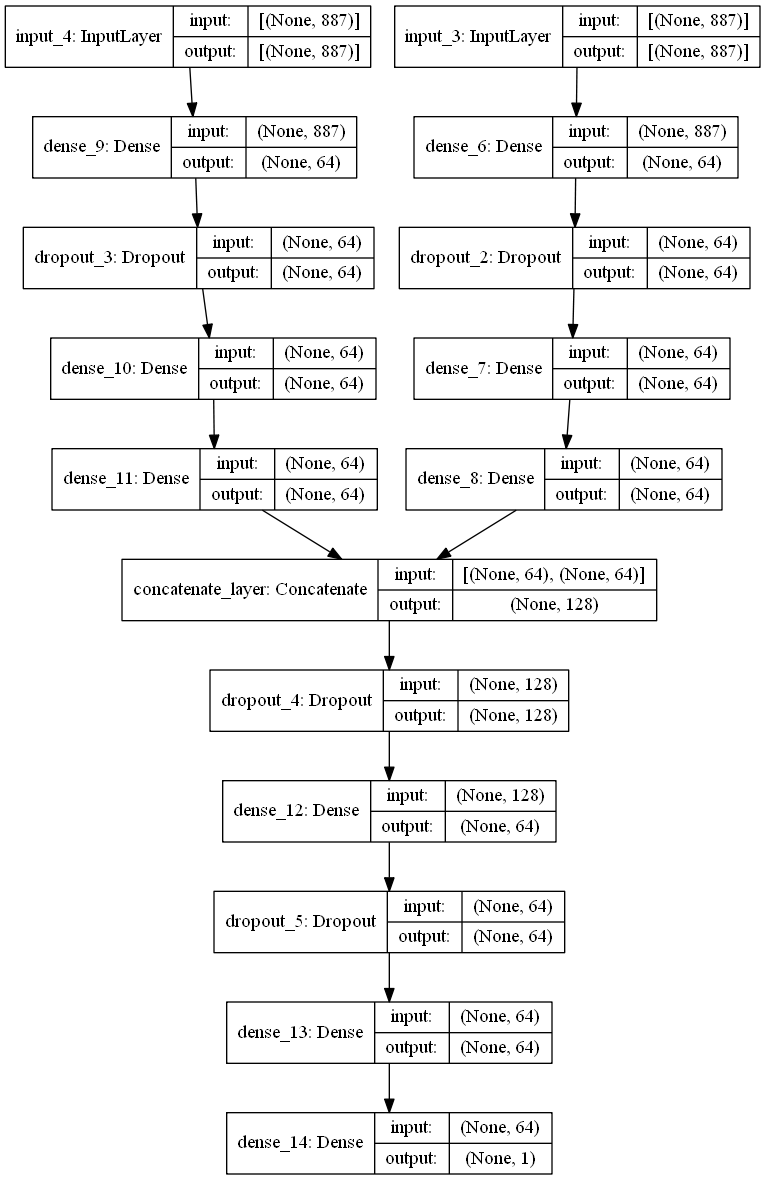

In [7]:
keras.utils.plot_model(model, "league_model.png", show_shapes=True)

In [92]:
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [93]:
model.fit(x=[blue_train,red_train], y=y_train,steps_per_epoch=len(blue_train) ,validation_data=([blue_test,red_test],y_test),epochs=30,validation_steps=len(blue_test))

Epoch 1/30
2500/2500 [==============================] - 2s 677us/step - loss: 0.7020 - accuracy: 0.5084 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 2/30
2500/2500 [==============================] - 2s 649us/step - loss: 0.6975 - accuracy: 0.5040 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 3/30
2500/2500 [==============================] - 2s 645us/step - loss: 0.6962 - accuracy: 0.5036 - val_loss: 0.6926 - val_accuracy: 0.5155
Epoch 4/30
2500/2500 [==============================] - 2s 640us/step - loss: 0.6960 - accuracy: 0.4988 - val_loss: 0.6926 - val_accuracy: 0.5155
Epoch 5/30
2500/2500 [==============================] - 2s 644us/step - loss: 0.6958 - accuracy: 0.4936 - val_loss: 0.6928 - val_accuracy: 0.5155
Epoch 6/30
2500/2500 [==============================] - 1s 562us/step - loss: 0.6958 - accuracy: 0.4996 - val_loss: 0.6928 - val_accuracy: 0.5155
Epoch 7/30
2500/2500 [==============================] - 1s 553us/step - loss: 0.6935 - accuracy: 0.5244 - val_loss: 0.6928 -

In [108]:
model.summary()

Model: "full_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 887)]        0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 887)]        0                                            
__________________________________________________________________________________________________
dense_88 (Dense)                (None, 64)           56832       input_20[0][0]                   
__________________________________________________________________________________________________
dense_85 (Dense)                (None, 64)           56832       input_19[0][0]                   
_________________________________________________________________________________________

In [97]:
preds = model.predict([blue_test,red_test])

In [99]:
# Evaluate how far off each prediction is from label
y = y_test.numpy()
preds = np.squeeze(preds)
abs(preds-y).mean()